# Softsusy example

In [1]:
import hepi
print(hepi.__version__)
import smpl
import numpy as np
from hepi.run import resummino as rs
from hepi.run import softsusy as sp
from hepi.run import feynhiggs as fh
import hepi.util as util
import matplotlib.pyplot as plt

rs.set_path("~/git/resummino")
sp.set_path("softpoint.x")
print (rs.get_path())
print (sp.get_path())

0.2.10.1
~/git/resummino
softpoint.x


/home/apn/git/HEPi/hepi/util.py:101: UserWarning: LHAPDF python binding not installed? Make sure you set PYTHONPATH correctly (i.e. correct python version) if you want to compute PDF uncertainties.
  warnings.warn(


QUEUEING TASKS | Checking input:   0%|          | 0/32 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/32 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/32 [00:00<?, ?it/s]

QUEUEING TASKS | Preparing:   0%|          | 0/32 [00:00<?, ?it/s]

PROCESSING TASKS | Preparing:   0%|          | 0/32 [00:00<?, ?it/s]

COLLECTING RESULTS | Preparing:   0%|          | 0/32 [00:00<?, ?it/s]

Skipped: 0 Not skipped: 32


QUEUEING TASKS | Running:   0%|          | 0/32 [00:00<?, ?it/s]

PROCESSING TASKS | Running:   0%|          | 0/32 [00:00<?, ?it/s]

COLLECTING RESULTS | Running:   0%|          | 0/32 [00:00<?, ?it/s]

QUEUEING TASKS | Parsing:   0%|          | 0/32 [00:00<?, ?it/s]

PROCESSING TASKS | Parsing:   0%|          | 0/32 [00:00<?, ?it/s]

COLLECTING RESULTS | Parsing:   0%|          | 0/32 [00:00<?, ?it/s]

/home/apn/git/HEPi/hepi/util.py:101: UserWarning: LHAPDF python binding not installed? Make sure you set PYTHONPATH correctly (i.e. correct python version) if you want to compute PDF uncertainties.
  warnings.warn(


QUEUEING TASKS | Checking input:   0%|          | 0/32 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/32 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/32 [00:00<?, ?it/s]

QUEUEING TASKS | Preparing:   0%|          | 0/32 [00:00<?, ?it/s]

PROCESSING TASKS | Preparing:   0%|          | 0/32 [00:00<?, ?it/s]

COLLECTING RESULTS | Preparing:   0%|          | 0/32 [00:00<?, ?it/s]

Skipped: 0 Not skipped: 32


QUEUEING TASKS | Running:   0%|          | 0/32 [00:00<?, ?it/s]

PROCESSING TASKS | Running:   0%|          | 0/32 [00:00<?, ?it/s]

COLLECTING RESULTS | Running:   0%|          | 0/32 [00:00<?, ?it/s]

QUEUEING TASKS | Parsing:   0%|          | 0/32 [00:00<?, ?it/s]

PROCESSING TASKS | Parsing:   0%|          | 0/32 [00:00<?, ?it/s]

COLLECTING RESULTS | Parsing:   0%|          | 0/32 [00:00<?, ?it/s]

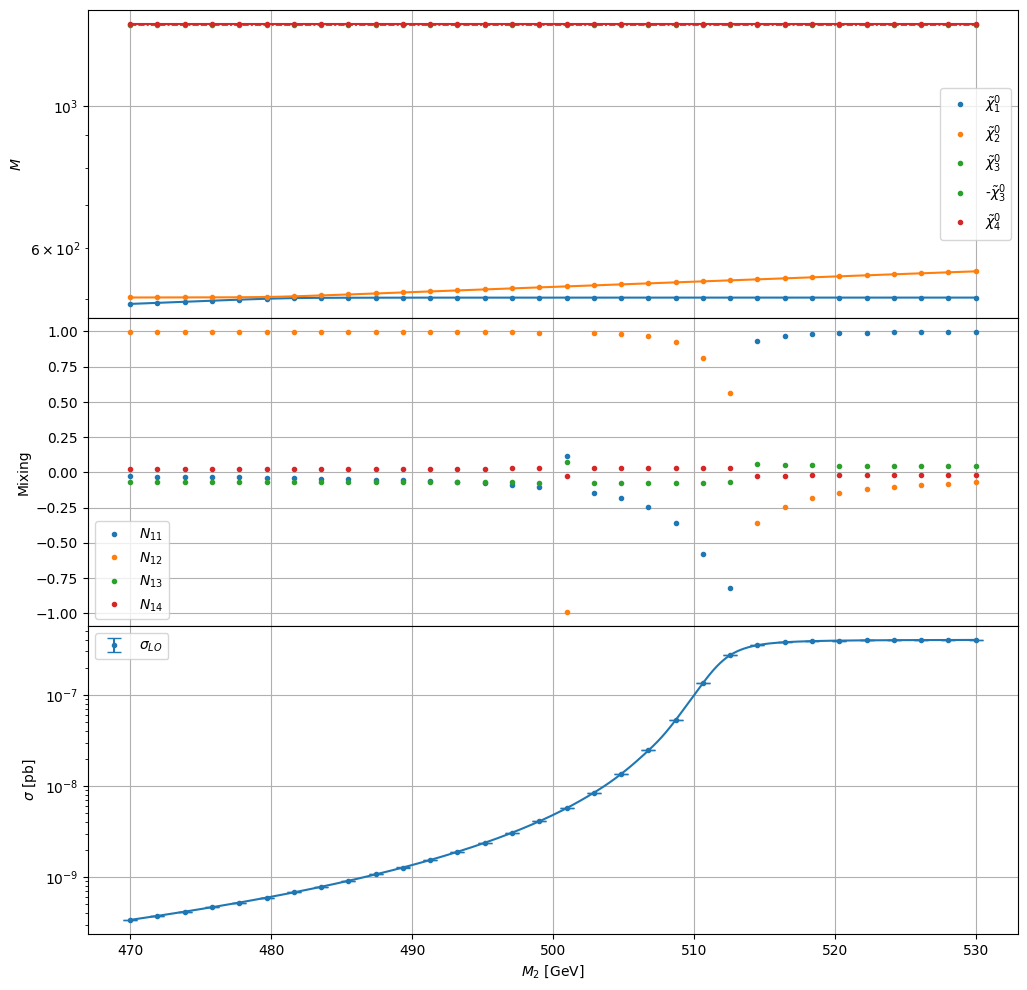

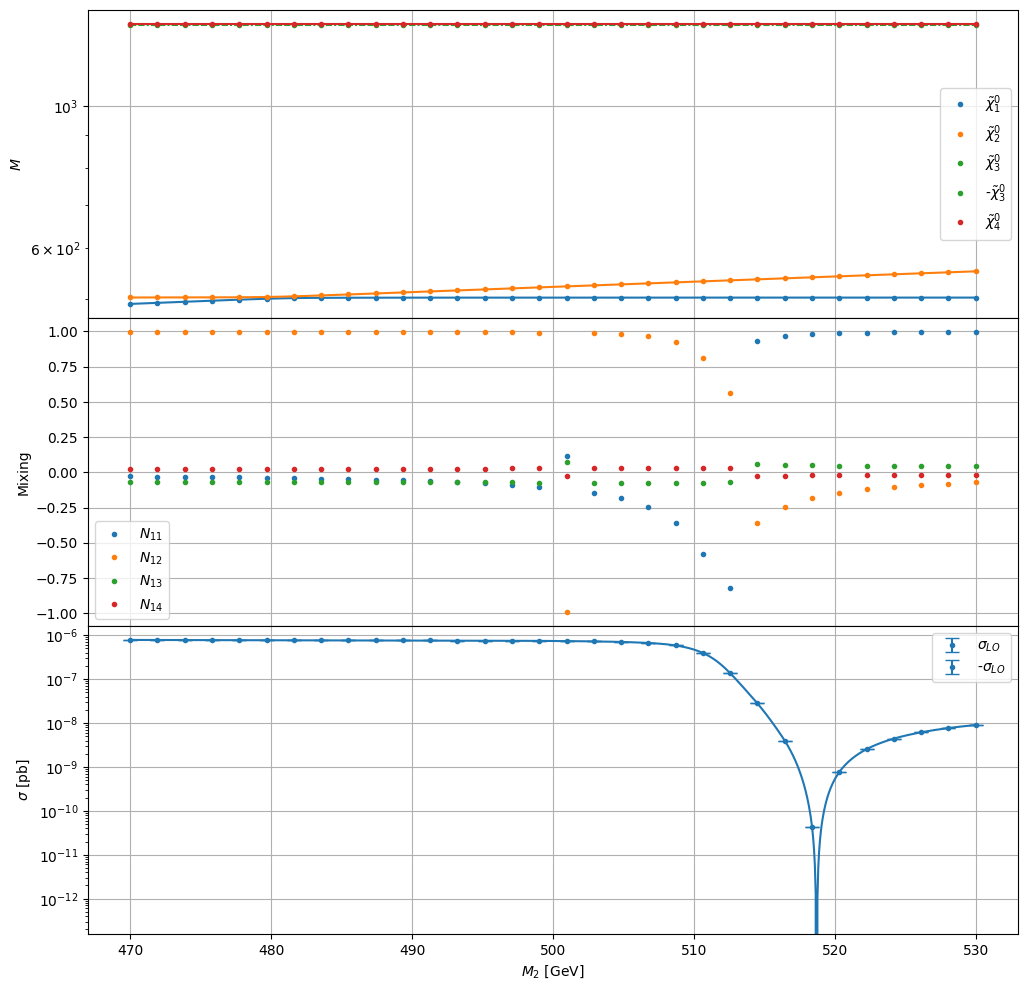

In [2]:
for sq in [2000002,1000002]:
    fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
    fig.subplots_adjust(hspace=0)
    for pdf,nlopdf in [("CT14lo","CT14lo")]:
        li = [hepi.Input(hepi.Order.LO,13000,sq,1000022,"pMSSM11_best_fit_LHC13-SUSYHIT.txt",pdf,nlopdf,1., 1.,id="test")]
        li=hepi.slha_scan_rel(li,lambda r : [["EXTPAR",1,510],["EXTPAR",2,r]],np.linspace(470.,530.,32))
        sp.run(li) # softsusy for full spectum
        fh.run(li) # feynhiggs for higgs spectrum
        dl = rs.run(li,True,True)
        for p in [1000022,1000023,1000025,1000035]:
            hepi.slha_plot(li,["EXTPAR",2],["MASS",p],axes=axs[0],logy=True,xaxis="$M_2$ [GeV]",yaxis="$M$",label="$"+hepi.get_name(p)+"$",tight=False)
        for nm1 in [1]:
            for nm2 in [1,2,3,4]:
                hepi.slha_plot(li,["EXTPAR",2],["NMIX",(nm1,nm2)],fmt="-",interpolate=False,xaxis="$M_2$ [GeV]",yaxis="Mixing",logy=False,axes=axs[1],label="$"+"N_{"+ str(nm1)+ str(nm2)+"}$",tight=False)
        hepi.vplot(hepi.slha_data(li,["EXTPAR",2]),dl["LO"],plot_data=True,axes=axs[2],xaxis="$M_2$ [GeV]",yaxis= "$\sigma$ [pb]",tight=False,label="$\sigma_{LO}$")